# First Steps in Keras

In this short tutorial we the model Inception to classify pictures. To this end, we will be using the Keras library with Tensorflow back-end. Furthermore, we use [this repo](https://github.com/fchollet/deep-learning-models) by fchollet [fchollet](http://github.com/fchollet) to work with the pre-trained models.

# Implementation

We start by importing all the required libraries.

In [1]:
from __future__ import print_function
import sys
sys.path.append('../')

In [37]:
# Import Inception model
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
# Libraries to handle images
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.applications import imagenet_utils
# Import NumPy
import numpy as np

In [38]:
inputShape = (299, 299)
preprocess = preprocess_input

Next, we define a function that predicts the labels of a set of images within a directory.

In [43]:
from os import listdir
from os.path import isfile, join

def predict_labels(model, directory_path):
    # Dictionary containing prediction of all images
    preds = {}
    for img_path in listdir(directory_path):
        # Load image
        path = join(directory_path, img_path)
        img = load_img(path, target_size=model['target_size'])
        # Convert image to array + preprocessing
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess(img) # Need to check out what he is actually doing here!
        # Predict label of the image
        preds[img_path] = imagenet_utils.decode_predictions(model['model'].predict(img))
    return preds

Now, we choose our model and predict the labels of our pictures. Note that models VGG16 and VGG19 only adress the problem of extracting features (meaning that they do not classify the input pictures).

In [41]:
# Load the selected model
model = InceptionV3(weights='imagenet')

In [44]:
# Predict labels
directory_path = '../dataset/imagenet/original/'
predictions = predict_labels(model_inception, directory_path)

Finally we show the pictures and the predicted labels (the first 5)

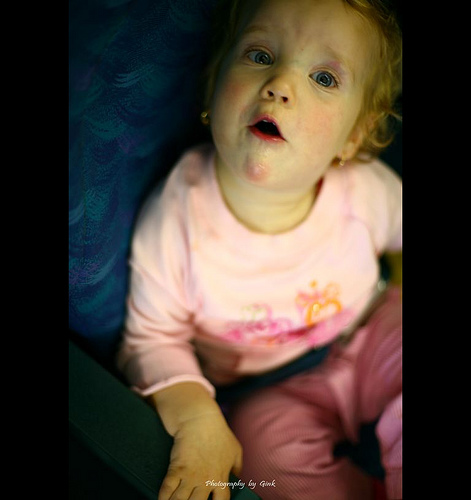

[[('n04376876', 'syringe', 0.2790201), ('n04074963', 'remote_control', 0.17831273), ('n03876231', 'paintbrush', 0.032710161), ('n04154565', 'screwdriver', 0.030442575), ('n02786058', 'Band_Aid', 0.027233912)]]


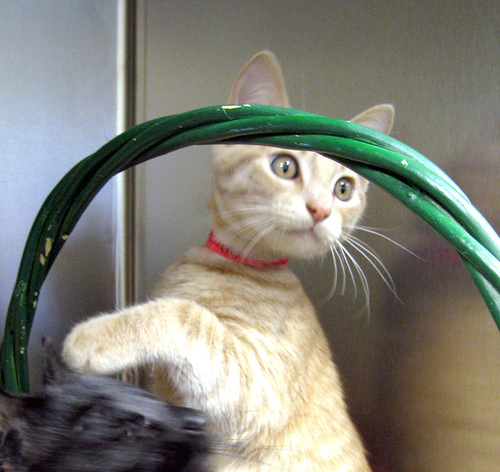

[[('n02909870', 'bucket', 0.35463312), ('n03482405', 'hamper', 0.1411975), ('n02123045', 'tabby', 0.11063509), ('n02127052', 'lynx', 0.044713859), ('n02124075', 'Egyptian_cat', 0.043166399)]]


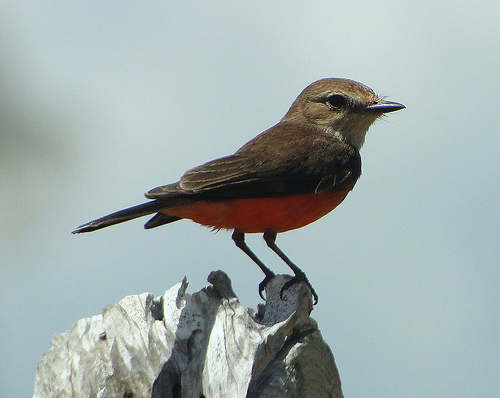

[[('n01558993', 'robin', 0.38236257), ('n01601694', 'water_ouzel', 0.17536914), ('n01843065', 'jacamar', 0.083184391), ('n01560419', 'bulbul', 0.046518546), ('n01530575', 'brambling', 0.022576578)]]


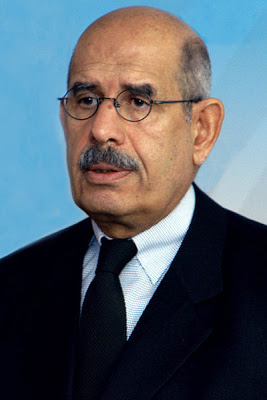

[[('n04350905', 'suit', 0.59046501), ('n04591157', 'Windsor_tie', 0.3063409), ('n10148035', 'groom', 0.0025836644), ('n03838899', 'oboe', 0.0023849139), ('n03832673', 'notebook', 0.0021774922)]]


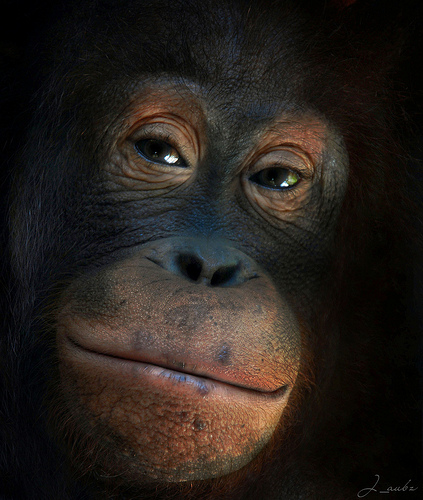

[[('n02480495', 'orangutan', 0.93816972), ('n02481823', 'chimpanzee', 0.0039175567), ('n02483708', 'siamang', 0.0028027128), ('n01641577', 'bullfrog', 0.0006515815), ('n02356798', 'fox_squirrel', 0.00039890138)]]


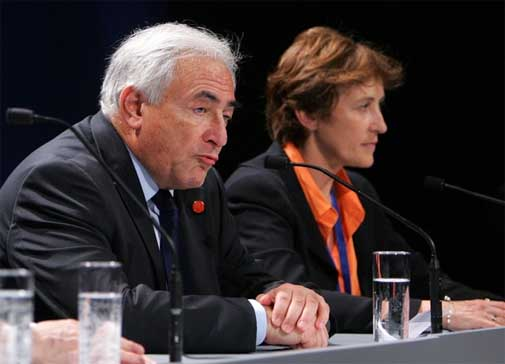

[[('n04296562', 'stage', 0.69777673), ('n03452741', 'grand_piano', 0.030515356), ('n03759954', 'microphone', 0.017419314), ('n02804610', 'bassoon', 0.011034084), ('n02669723', 'academic_gown', 0.0098910304)]]


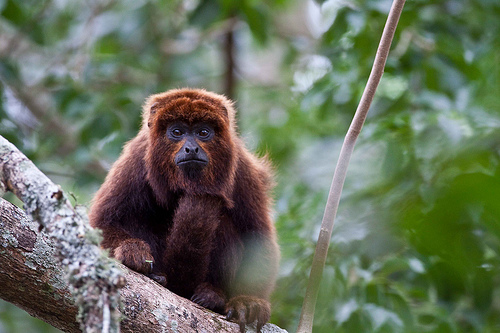

[[('n02493509', 'titi', 0.7036823), ('n02492660', 'howler_monkey', 0.13509843), ('n02486261', 'patas', 0.0065630162), ('n02487347', 'macaque', 0.0062737297), ('n02493793', 'spider_monkey', 0.0061346591)]]


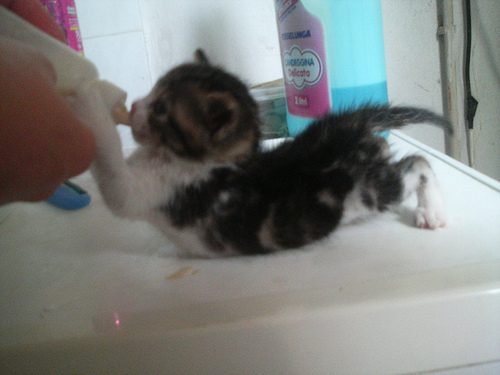

[[('n02808440', 'bathtub', 0.44985017), ('n04493381', 'tub', 0.091409996), ('n04070727', 'refrigerator', 0.067273162), ('n02342885', 'hamster', 0.040627729), ('n04553703', 'washbasin', 0.03280909)]]


In [45]:
from IPython.display import Image, display

for p in predictions:
    display(Image(filename=join(directory_path, p)))
    print(predictions[p])

Let us visualize closest match to some of the pictures! We just define a function that searches for a given WordNet ID.

In [22]:
import webbrowser
def open_closest_set(wnid):
    webbrowser.open_new("http://www.image-net.org/synset?wnid="+wnid)

In [28]:
open_closest_set("n06359193")